# ABCB7
[X-linked spinocerebellar ataxia-6 with or without sideroblastic anemia (SCAX6)](https://omim.org/entry/301310) is caused by hemizygous mutation in the ABCB7 gene.
We could not identify previously published genotype-phenotype correlations.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.7.1


## ABCB7
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ABCB7.

In [2]:
gene_symbol = 'ABCB7'
mane_tx_id = 'NM_001271696.3'
mane_protein_id = 'NP_001258625.1' # iron-sulfur clusters transporter ABCB7, mitochondrial isoform 2

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.20'  # Update, if necessary
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

print(f'Loaded {len(phenopackets)} phenopackets for {gene_symbol}')

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')
qc.summarize()

Loaded 18 phenopackets for ABCB7
Individuals Processed: 100%|██████████| 18/18 [00:00<00:00, 1637.97individuals/s]
Loaded 18 individuals
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Global developmental delay,HP:0001263,15
Dysarthria,HP:0001260,15
Nonprogressive cerebellar ataxia,HP:0002470,11
Postural instability,HP:0002172,9
Nystagmus,HP:0000639,9
Increased erythrocyte protoporphyrin concentration,HP:0012187,8
Cerebellar hypoplasia,HP:0001321,7
Gait disturbance,HP:0001288,7
Ophthalmoplegia,HP:0000602,5
Anemia,HP:0001903,5


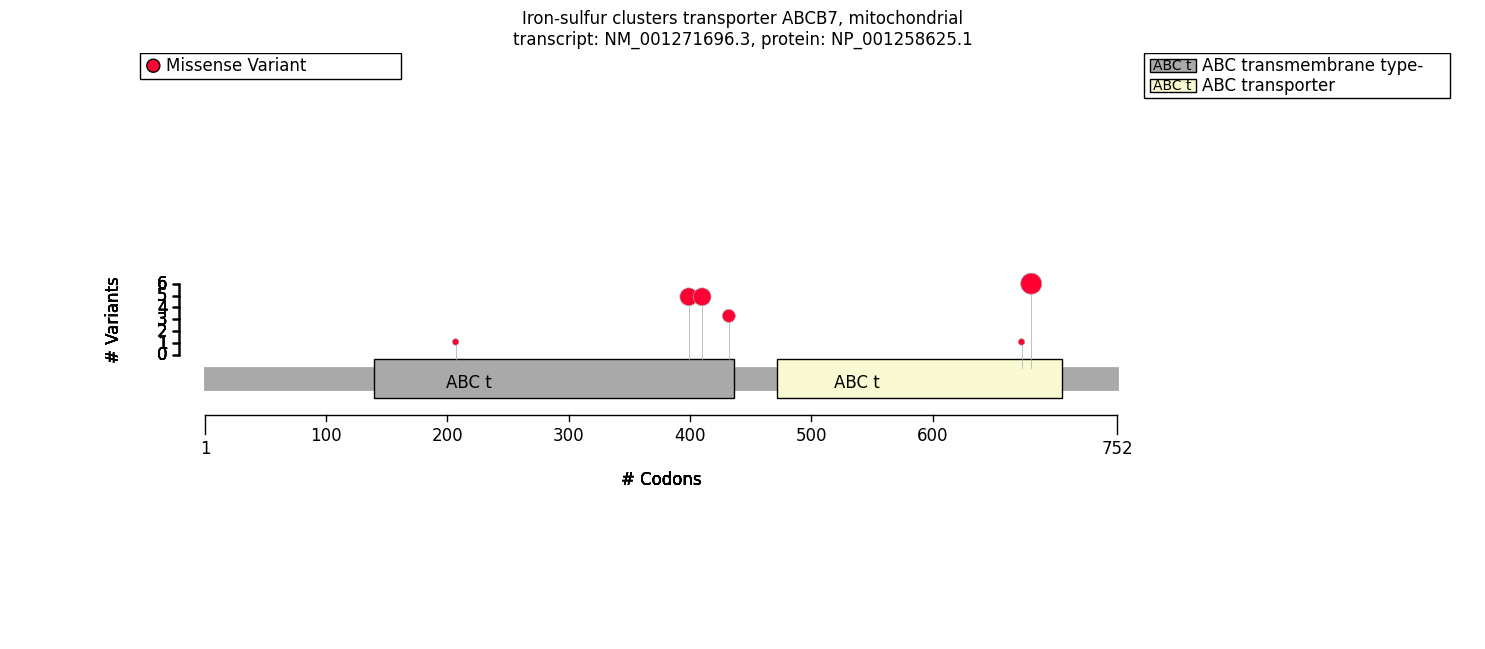

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
viewer.process(cohort=cohort)

Name,Type,Coordinates,Count,Variants
ABC transmembrane type-1,DOMAIN,140 - 436,11,p.Glu208Asp; p.Val411Leu; p.Glu433Lys; p.Ile400Met
ABC transporter,DOMAIN,472 - 706,7,p.Gly682Ser; p.Asp674Gly


### Prepare the phenotype predicate

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.analysis.predicate.genotype import VariantPredicates
tmem = VariantPredicates.protein_feature(protein_metadata=protein_meta, feature_id="ABC transmembrane type-1")


from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
nterm_predicate = monoallelic_predicate(
    a_predicate=tmem,
    b_predicate=~tmem,
    a_label="ABC transmembrane type-1",
    b_label="Other region") 

tmem_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=nterm_predicate,
    pheno_predicates=pheno_predicates,
)
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(tmem_result)

Code,Reason,Count
HMF03,Skipping term because of a child term with the same individual counts,9
HMF05,Skipping term because one genotype had zero observations,3
HMF08,Skipping general term,39
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,84


In [9]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo=hpo, result=tmem_result)

Allele group                                       ABC transmembrane type-1  \
                                                                      Count   
Global developmental delay [HP:0001263]                                 8/8   
Nonprogressive cerebellar ataxia [HP:0002470]                           5/5   
Ataxia [HP:0001251]                                                     9/9   
Dysarthria [HP:0001260]                                                 8/8   
Abnormal communication [HP:0034434]                                     8/8   
Morphological central nervous system abnormalit...                      3/3   
Abnormal cerebellum morphology [HP:0001317]                             3/3   
Abnormal brain morphology [HP:0012443]                                  3/3   
Postural instability [HP:0002172]                                       2/2   
Anemia [HP:0001903]                                                     8/8   
Abnormal reflex [HP:0031826]                                            7/7   
Nystagmus [HP:0000639]                                                  4/4   

Allele group                                               Other region  \
                                                   Percent        Count   
Global developmental delay [HP:0001263]               100%          7/7   
Nonprogressive cerebellar ataxia [HP:0002470]         100%          6/6   
Ataxia [HP:0001251]                                   100%          7/7   
Dysarthria [HP:0001260]                               100%          7/7   
Abnormal communication [HP:0034434]                   100%          7/7   
Morphological central nervous system abnormalit...    100%          7/7   
Abnormal cerebellum morphology [HP:0001317]           100%          6/6   
Abnormal brain morphology [HP:0012443]                100%          7/7   
Postural instability [HP:0002172]                     100%          7/7   
Anemia [HP:0001903]                                   100%          1/1   
Abnormal reflex [HP:0031826]                          100%          1/1   
Nystagmus [HP:0000639]                                100%          5/5   

Allele group                                                                   \
                                                   Percent Corrected p values   
Global developmental delay [HP:0001263]               100%                1.0   
Nonprogressive cerebellar ataxia [HP:0002470]         100%                1.0   
Ataxia [HP:0001251]                                   100%                1.0   
Dysarthria [HP:0001260]                               100%                1.0   
Abnormal communication [HP:0034434]                   100%                1.0   
Morphological central nervous system abnormalit...    100%                1.0   
Abnormal cerebellum morphology [HP:0001317]           100%                1.0   
Abnormal brain morphology [HP:0012443]                100%                1.0   
Postural instability [HP:0002172]                     100%                1.0   
Anemia [HP:0001903]                                   100%                1.0   
Abnormal reflex [HP:0031826]                          100%                1.0   
Nystagmus [HP:0000639]                                100%                1.0   

Allele group                                                 
                                                   p values  
Global developmental delay [HP:0001263]                 1.0  
Nonprogressive cerebellar ataxia [HP:0002470]           1.0  
Ataxia [HP:0001251]                                     1.0  
Dysarthria [HP:0001260]                                 1.0  
Abnormal communication [HP:0034434]                     1.0  
Morphological central nervous system abnormalit...      1.0  
Abnormal cerebellum morphology [HP:0001317]             1.0  
Abnormal brain morphology [HP:0012443]                  1.0  
Postural instability [HP:0002172]                       1.0  
Anemia [HP:0001903]      

In [10]:
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
g682s = VariantPredicates.variant_key("X_75053585_75053585_C_T") #c.2044G>A	p.Gly682Ser
g682s_predicate = monoallelic_predicate(
    a_predicate=g682s,
    b_predicate= ~g682s,
    a_label='p.Gly682Ser', 
    b_label='Other variant',
)

In [11]:
g682s_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=g682s_predicate,
    pheno_predicates=pheno_predicates,
)
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, g682s_result)

Allele group                                       p.Gly682Ser          \
                                                         Count Percent   
Global developmental delay [HP:0001263]                    6/6    100%   
Nonprogressive cerebellar ataxia [HP:0002470]              6/6    100%   
Ataxia [HP:0001251]                                        6/6    100%   
Dysarthria [HP:0001260]                                    6/6    100%   
Abnormal communication [HP:0034434]                        6/6    100%   
Morphological central nervous system abnormalit...         6/6    100%   
Abnormal cerebellum morphology [HP:0001317]                6/6    100%   
Abnormal brain morphology [HP:0012443]                     6/6    100%   
Postural instability [HP:0002172]                          6/6    100%   
Nystagmus [HP:0000639]                                     4/4    100%   

Allele group                                       Other variant          \
                                                           Count Percent   
Global developmental delay [HP:0001263]                      9/9    100%   
Nonprogressive cerebellar ataxia [HP:0002470]                5/5    100%   
Ataxia [HP:0001251]                                        10/10    100%   
Dysarthria [HP:0001260]                                      9/9    100%   
Abnormal communication [HP:0034434]                          9/9    100%   
Morphological central nervous system abnormalit...           4/4    100%   
Abnormal cerebellum morphology [HP:0001317]                  3/3    100%   
Abnormal brain morphology [HP:0012443]                       4/4    100%   
Postural instability [HP:0002172]                            3/3    100%   
Nystagmus [HP:0000639]                                       5/5    100%   

Allele group                                                                    
                                                   Corrected p values p values  
Global developmental delay [HP:0001263]                           1.0      1.0  
Nonprogressive cerebellar ataxia [HP:0002470]                     1.0      1.0  
Ataxia [HP:0001251]                                               1.0      1.0  
Dysarthria [HP:0001260]                                           1.0      1.0  
Abnormal communication [HP:0034434]                               1.0      1.0  
Morphological central nervous system abnormalit...                1.0      1.0  
Abnormal cerebellum morphology [HP:0001317]                       1.0      1.0  
Abnormal brain morphology [HP:0012443]                            1.0      1.0  
Postural instability [HP:0002172]                                 1.0      1.0  
Nystagmus [HP:0000639]                                            1.0      1.0

In [12]:
from gpseacs.report import GpseaAnalysisReport
report_list = [tmem_result, g682s_result]
abcb7_caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=report_list,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=abcb7_caption)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

extracted 0 FET significant results
extracted 0 FET significant results


Genotype (A),Genotype (B),Tests performed,Significant tests
ABC transmembrane type-1,Other region,12,0
Genotype (A),Genotype (B),Tests performed,Significant tests
p.Gly682Ser,Other variant,10,0
